In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

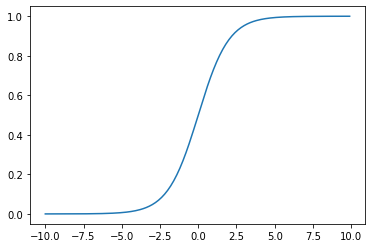

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

In [3]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [4]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica
57,4.9,2.4,1,1.0,False,versicolor
1,4.9,3.0,1,0.2,True,setosa
70,5.9,3.2,1,1.8,False,versicolor
25,5.0,3.0,1,0.2,True,setosa
84,5.4,3.0,1,1.5,False,versicolor


## Overview

1. regression for petal width
2. binary classification for setosa: T/F
3. binary classification for setosa: prob(T)
4. multi-class classification for variety

In [5]:
# model 1: petals
reg = LinearRegression(fit_intercept=False)
reg.fit(train[xcols], train["petal width (cm)"])
test["prediction"] = reg.predict(test[xcols])
test.head()

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction
82,5.8,2.7,1,1.2,False,versicolor,1.327769
134,6.1,2.6,1,1.4,False,virginica,1.590835
114,5.8,2.8,1,2.4,False,virginica,1.279061
42,4.4,3.2,1,0.2,True,setosa,0.083889
109,7.2,3.6,1,2.5,False,virginica,1.889735


In [6]:
# model 2: is it a setosa?  (binary classification)
cls = LogisticRegression(fit_intercept=False) # a classifier, not a regressor, despite the name!
cls.fit(train[xcols], train["setosa"])
test["prediction"] = cls.predict(test[xcols])
test["setosa_prob"] = cls.predict_proba(test[xcols])[:, 1]
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,False,0.059437
134,6.1,2.6,1,1.4,False,virginica,False,0.020275
114,5.8,2.8,1,2.4,False,virginica,False,0.085368
42,4.4,3.2,1,0.2,True,setosa,True,0.929430
109,7.2,3.6,1,2.5,False,virginica,False,0.066543
57,4.9,2.4,1,1.0,False,versicolor,False,0.147721
1,4.9,3.0,1,0.2,True,setosa,True,0.642773
70,5.9,3.2,1,1.8,False,versicolor,False,0.258524
25,5.0,3.0,1,0.2,True,setosa,True,0.585481
84,5.4,3.0,1,1.5,False,versicolor,False,0.349072


In [7]:
# [[False Prob, True Prob], ...]
cls.predict_proba(test[xcols])

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

In [8]:
# model 3: what is the variety?  (multi-class classification)
multi = LogisticRegression(fit_intercept=False) # a classifier, not a regressor, despite the name!
multi.fit(train[xcols], train["variety"])
test["prediction"] = multi.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


# How does the math work?

In [9]:
reg, cls, multi

(LinearRegression(fit_intercept=False),
 LogisticRegression(fit_intercept=False),
 LogisticRegression(fit_intercept=False))

In [10]:
reg.coef_

array([ 0.71452794, -0.48708032, -1.5013766 ])

In [11]:
def reg_predict(X):
    return X @ reg.coef_

reg_predict(test[xcols]) # same as reg.predict(test[xcols])

82     1.327769
134    1.590835
114    1.279061
42     0.083889
109    1.889735
57     0.830818
1      0.538569
70     1.155681
25     0.610022
84     0.895833
dtype: float64

In [12]:
cls.coef_.T

array([[-2.42108094],
       [ 3.90002306],
       [ 0.75064911]])

In [13]:
def cls_predict(X):
    return X @ cls.coef_.T > 0

cls_predict(test[xcols]) # same as cls.predict(test[xcols])

,0
82,False
134,False
114,False
42,True
109,False
57,False
1,True
70,False
25,True
84,False


In [14]:
def cls_predict_proba(X):
    return sigmoid(X @ cls.coef_.T)

cls_predict_proba(test[xcols])

,0
82,0.059437
134,0.020275
114,0.085368
42,0.929430
109,0.066543
57,0.147721
1,0.642773
70,0.258524
25,0.585481
84,0.349072


In [15]:
cls.predict_proba(test[xcols])

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

In [16]:
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


In [17]:
multi.coef_.T

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

In [18]:
multi.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
test[xcols].values @ multi.coef_.T

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [20]:
# argmax vs. max
a = np.array([1,2,9,3,2,4,3])
a.max()

9

In [21]:
a.argmax() # biggest number is at index 2

2

In [22]:
def multi_predict(X):
    return multi.classes_[(test[xcols].values @ multi.coef_.T).argmax(axis=1)]

multi_predict(test[xcols])

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [23]:
multi.predict(test[xcols])

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [24]:
# general pattern:
# matrix of data @ vertical vector of coefficients

# many predictions in paralles
# matrix of data @ matrix where each column contains coefficients for a different predictor

# How can we visualize decision boundaries?

In [25]:
# need to learn: meshgrids, and contourf

In [26]:
sepw, sepl = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))

In [27]:
sepw.shape

(100, 100)

In [28]:
sepl.shape

(100, 100)

In [29]:
sepl

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       ...,
       [9.7, 9.7, 9.7, ..., 9.7, 9.7, 9.7],
       [9.8, 9.8, 9.8, ..., 9.8, 9.8, 9.8],
       [9.9, 9.9, 9.9, ..., 9.9, 9.9, 9.9]])

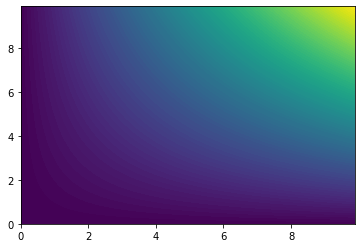

In [30]:
Z = sepw * sepl
plt.contourf(sepw, sepl, Z, levels=100)

In [31]:
xcols

['sepal length (cm)', 'sepal width (cm)', 'const']

In [32]:
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})

Z = cls.predict(predict_df)
Z

array([ True,  True,  True, ...,  True,  True,  True])

<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

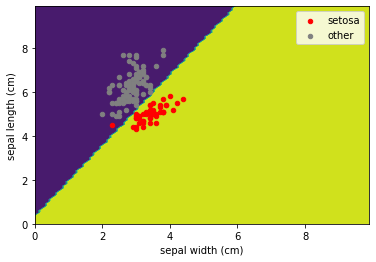

In [39]:
ax = plt.contourf(sepw, sepl, Z.reshape(sepw.shape))
setosa = df[df["setosa"]]
others = df[~df["setosa"]]

setosa.plot.scatter(x="sepal width (cm)", y="sepal length (cm)", ax=plt.gca(),
                    color="red", label="setosa")
others.plot.scatter(x="sepal width (cm)", y="sepal length (cm)", ax=plt.gca(),
                    color="0.5", label="other")

In [43]:
multi.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})

Z = multi.predict(predict_df)
Z

array(['versicolor', 'setosa', 'setosa', ..., 'setosa', 'setosa',
       'setosa'], dtype=object)

In [51]:
classes = list(multi.classes_)
Z = [classes.index(val) for val in Z]
Z = np.array(Z)
Z

array([1, 0, 0, ..., 0, 0, 0])

<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

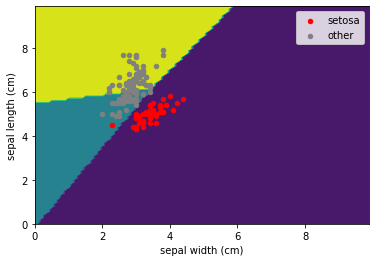

In [52]:
ax = plt.contourf(sepw, sepl, Z.reshape(sepw.shape))
setosa = df[df["setosa"]]
others = df[~df["setosa"]]

setosa.plot.scatter(x="sepal width (cm)", y="sepal length (cm)", ax=plt.gca(),
                    color="red", label="setosa")
others.plot.scatter(x="sepal width (cm)", y="sepal length (cm)", ax=plt.gca(),
                    color="0.5", label="other")
# TODO: scatter for each variety with different color

/home/trh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


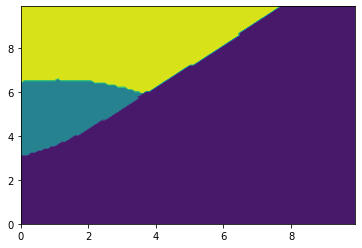

In [58]:
# how do we have non-straight lines?
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# train a poly model
model = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lr", LogisticRegression()),
])
model.fit(train[xcols], train["variety"])

# make predictions for the whole space
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})

# decision boundaries
Z = model.predict(predict_df)
classes = list(multi.classes_)
Z = [classes.index(val) for val in Z]
Z = np.array(Z)
plt.contourf(sepw, sepl, Z.reshape(sepw.shape))

In [59]:
# strategy for finding coef_
# c = SOMETHING RANDOM
# LOOP
#     try to tweak c to improve accuracy
#     if accuracy isn't getting better, break out of loop

In [62]:
model["lr"].coef_

array([[ 0.00991516, -0.06438908,  0.12378037,  0.00991516, -0.81908929,
         0.41141959, -0.06438908,  0.73920065,  0.12378037,  0.00991516],
       [-0.03207347,  0.02815056, -0.09693136, -0.03207347,  0.32907139,
        -0.16532446,  0.02815056, -0.45982208, -0.09693136, -0.03207347],
       [ 0.02215831,  0.03623852, -0.02684902,  0.02215831,  0.4900179 ,
        -0.24609513,  0.03623852, -0.27937857, -0.02684902,  0.02215831]])

In [65]:
multi = LogisticRegression(fit_intercept=False, max_iter=25)
multi.fit(train[xcols], train["variety"])

/home/trh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, max_iter=25)

In [ ]:
# LogisticRegression weaknesses
# 1. it doesn't like large numbers in feature columns
# 2. doesn't like non-"centered" data (the average of a column is not zero)

In [71]:
multi = LogisticRegression(fit_intercept=False, max_iter=50)
multi.fit(train[xcols], train["variety"])

LogisticRegression(fit_intercept=False, max_iter=50)

In [72]:
multi = LogisticRegression(fit_intercept=False, max_iter=50)
multi.fit(train[xcols]+100, train["variety"])

/home/trh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, max_iter=50)

In [74]:
# standard scaling by hand
a = np.array([1,2,99,100])
a

array([  1,   2,  99, 100])

In [78]:
(a - a.mean()) / a.std()

array([-1.01015149, -0.98974439,  0.98974439,  1.01015149])

In [82]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(train[xcols] + 50)

array([[-0.32099155, -0.14768777,  0.        ],
       [ 0.52691066, -0.60211169,  0.        ],
       [ 1.49594175, -0.14768777,  0.        ],
       [ 1.73819952, -0.37489973,  0.        ],
       [-1.04776487,  0.76116006,  0.        ],
       [-0.92663598,  0.5339481 ,  0.        ],
       [ 0.52691066, -0.82932365,  0.        ],
       [ 1.85932841, -0.60211169,  0.        ],
       [-0.92663598,  1.44279594,  0.        ],
       [-1.29002264, -0.14768777,  0.        ],
       [ 0.28465288, -0.60211169,  0.        ],
       [ 0.64803954, -0.60211169,  0.        ],
       [-0.68437821,  1.44279594,  0.        ],
       [ 0.52691066, -1.28374757,  0.        ],
       [-0.32099155, -0.14768777,  0.        ],
       [ 0.40578177,  0.76116006,  0.        ],
       [ 0.64803954, -0.37489973,  0.        ],
       [-0.19986266, -0.37489973,  0.        ],
       [ 0.28465288, -0.37489973,  0.        ],
       [ 0.64803954, -0.60211169,  0.        ],
       [-0.92663598,  0.76116006,  0.   

In [84]:
multi = Pipeline([
    ("std", StandardScaler()),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=50)),
])
multi.fit(train[xcols]+100, train["variety"])

Pipeline(steps=[('std', StandardScaler()),
                ('lr', LogisticRegression(fit_intercept=False, max_iter=50))])

In [ ]:
# Best Practices:
# 1. always use StandardScaler when you're doing LogisticRegression
# 2. if you have PolynomialFeatures in the same pipeline with StandardScaler, do PolynomialFeatures first